<a href="https://colab.research.google.com/github/karthikchary/Visualization/blob/master/Visualization_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [ ]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df_raw.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [ ]:
df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x : x.mean())

In [ ]:
df.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


In [ ]:
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

In [ ]:
# Draw plot
import matplotlib.patches as patches

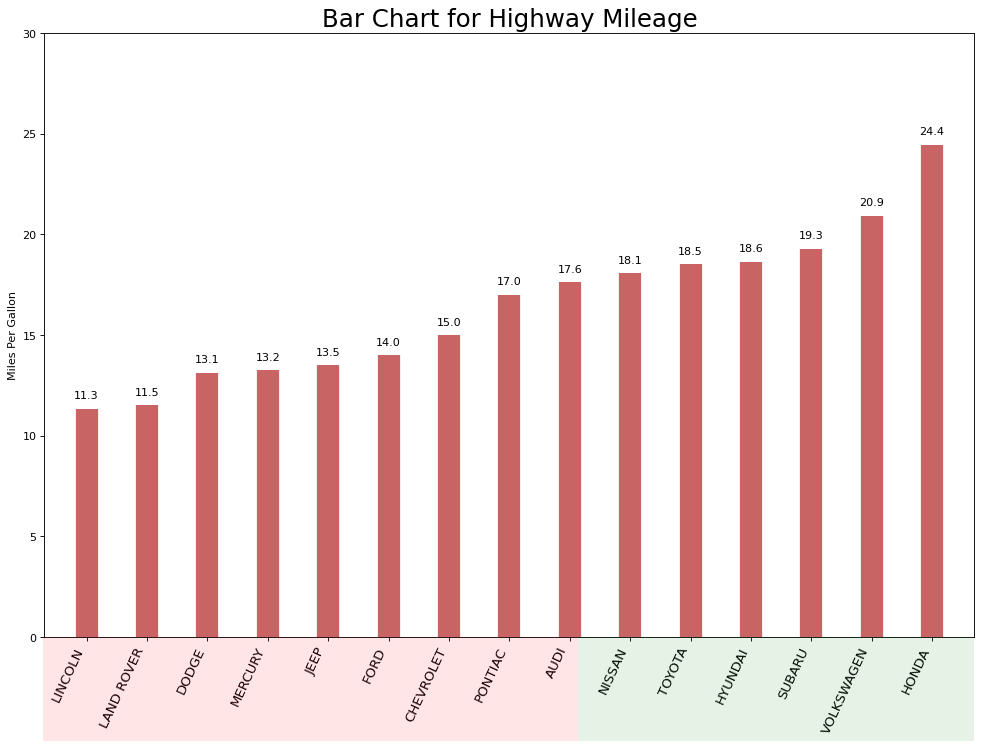

In [ ]:
fig, ax = plt.subplots(figsize=(15,10),facecolor='white',dpi=80)

ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick',alpha=0.7,linewidth=20)

for i, cty in enumerate(df.cty):
  ax.text(i, cty+0.5, round(cty,1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index,df.manufacturer.str.upper(),rotation=65,horizontalalignment='right',fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57,-0.005),width=.33,height=.13,alpha=.1,facecolor='green',transform=fig.transFigure)

p2 = patches.Rectangle((.124, -0.005),width=.446,height=.13,alpha=.1,facecolor='red',transform=fig.transFigure)

fig.add_artist(p1)
fig.add_artist(p2)
plt.show()